In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from preprocessing import StandardScaler, Split
from model import Regressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
timesteps = 90
start = 100
end = 90

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
x = []
y = []
for i in range(timesteps, data.shape[0]):
    x.append(data[i-timesteps:i])
    y.append(data[i])
x = np.array(x).reshape(-1, 6, 1, 15)
y = np.array(y).reshape(-1, 1)

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [6]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [7]:
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
x_val = torch.FloatTensor(x_val).to(device)
y_val = torch.FloatTensor(y_val).to(device)
x_test = torch.FloatTensor(x_test).to(device)

In [8]:
tmp = x_test[100].unsqueeze(0)

In [9]:
ls = []
model = Regressor().to(device)
model = torch.load(f'checkpoint.pt')

In [10]:
model.eval()
for _ in range(90):
    with torch.no_grad():
        pred = model(tmp)
        ls.append(pred.cpu().numpy())
        tmp = torch.cat((tmp.view(-1, 1), pred))
        tmp = tmp[-timesteps:]
        tmp = tmp.view(1, 6, 1, 15)

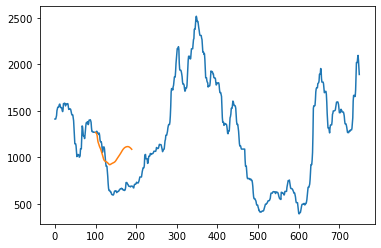

In [11]:
pred = scaler.inverse_transform(np.array(ls).reshape(-1))
plt.plot(y_test)
plt.plot(range(start, start+end),pred)
plt.show()